In [1]:
import os
import cv2
from skimage.feature import hog

# Function to extract edge histograms
def get_edge_histograms_from_folder(folder_path):
    edge_histograms = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            # Read the image
            img = cv2.imread(os.path.join(folder_path, filename))
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Calculate HOG features with consistent length (e.g., 36)
            features = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')
            edge_histograms.append(features.tolist())  # Convert numpy array to list
    return edge_histograms  # Returns a list of lists

# Set the folder paths
folder1 = "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02112706-Brabancon_griffon/"
folder2 = "C:/Users/HP/Data_Mining/Standford Dogs Dataset/images/Images/n02085936-Maltese_dog/"

# Get edge histograms for the two classes
edge_histograms_class1 = get_edge_histograms_from_folder(folder1)
edge_histograms_class2 = get_edge_histograms_from_folder(folder2)

In [2]:
from sklearn.decomposition import PCA
import numpy as np

# Combine the histograms from both classes
all_edge_histograms = edge_histograms_class1 + edge_histograms_class2

# Ensure all HOG features have the same length
feature_lengths = [len(features) for features in all_edge_histograms]

# Pad feature vectors to ensure they have the same length
max_length = max(feature_lengths)
padded_edge_histograms = [np.pad(features, (0, max_length - len(features)), 'constant') for features in all_edge_histograms]

# Apply PCA to the padded feature vectors
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(padded_edge_histograms)

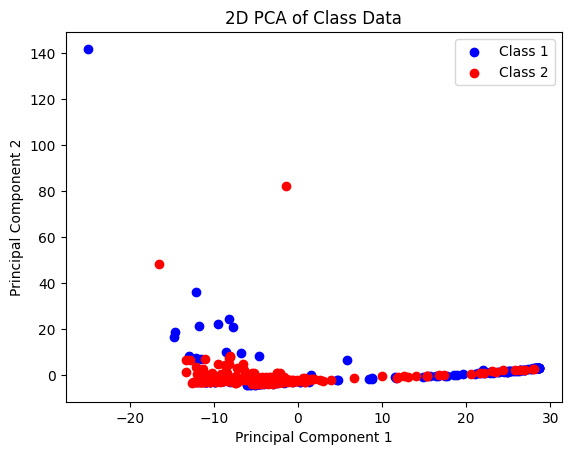

In [3]:
import matplotlib.pyplot as plt

class1_points = reduced_features[:len(edge_histograms_class1)]  # Points from class 1
class2_points = reduced_features[len(edge_histograms_class1):]  # Points from class 2

# Create a scatter plot
plt.scatter(class1_points[:, 0], class1_points[:, 1], c='b', label='Class 1')  # Blue color for class 1
plt.scatter(class2_points[:, 0], class2_points[:, 1], c='r', label='Class 2')  # Red color for class 2

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Class Data')
plt.legend()
plt.show()

In [4]:
## From the above plot, we can see that there is significant overlap in the data points after performing PCA.
## This indicates that the data from the two classes are not well-separated in the reduced 2D feature space.